In [1]:
# ======================
# 1. 导入必要的库
# ======================
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 设置随机种子以确保可重复性
torch.manual_seed(42)
np.random.seed(42)

In [ ]:
# ======================
# 2. 数据加载与预处理
# ======================


{
    "GRC": "GRE",
    "IRI": "IRN",
}
# 读取奖牌数据
medal_df = pd.read_csv('data/medal_merge.csv')
print("原始奖牌数据形状:", medal_df.shape)
print("前5行数据：")
display(medal_df.head())

# 读取运动员数据
athletes_df = pd.read_csv('data/athletes.csv')
print("\n原始运动员数据形状:", athletes_df.shape)
print("前5行数据：")
display(athletes_df.head())

原始奖牌数据形状: (1435, 8)
前5行数据：


,Rank,NOC,Gold,Silver,Bronze,Total,Year,is_host
0,1,USA,11,7,2,20,1896,0
1,2,GRC,10,18,19,47,1896,1
2,3,DEU,6,5,2,13,1896,0
3,4,FRA,5,4,2,11,1896,0
4,5,GBR,2,3,2,7,1896,0



原始运动员数据形状: (252565, 9)
前5行数据：


,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,Gunnar Aaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Cornelia (-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


In [6]:
# 处理运动员数据
# 计算运动员数量
athletes_count = athletes_df.groupby(['NOC', 'Year'])['Name'].nunique().reset_index(name='Athletes_count')

athletes_count.to_csv('data/athletes_count.csv', index=False)
display(athletes_count.head(30))

,NOC,Year,Athletes_count
0,AFG,1936,15
1,AFG,1948,22
2,AFG,1956,12
3,AFG,1960,12
4,AFG,1964,8
5,AFG,1968,5
6,AFG,1972,8
7,AFG,1980,11
8,AFG,1988,5
9,AFG,1996,2


In [7]:
# 计算赛事数量
events_count = athletes_df.groupby(['NOC', 'Year'])['Event'].nunique().reset_index(name='Events_count')

events_count.to_csv('data/events_count.csv', index=False)
display(events_count.head())

,NOC,Year,Events_count
0,AFG,1936,4
1,AFG,1948,2
2,AFG,1956,1
3,AFG,1960,13
4,AFG,1964,8


In [9]:
# 计算运动项目数量
sports_count = athletes_df.groupby(['NOC', 'Year'])['Sport'].nunique().reset_index(name='Sports_count')

display(sports_count.head())

,NOC,Year,Sports_count
0,AFG,1936,2
1,AFG,1948,2
2,AFG,1956,1
3,AFG,1960,2
4,AFG,1964,1


In [10]:
# 合并运动员相关特征
athletes_features = athletes_count.merge(events_count, on=['NOC', 'Year'])

display(athletes_features.head())

athletes_features = athletes_features.merge(sports_count, on=['NOC', 'Year'])

# display(athletes_features[athletes_features['NOC'] == 'GRC'].head())

,NOC,Year,Athletes_count,Events_count
0,AFG,1936,15,4
1,AFG,1948,22,2
2,AFG,1956,12,1
3,AFG,1960,12,13
4,AFG,1964,8,8


,NOC,Year,Athletes_count,Events_count,Sports_count


In [8]:
display(athletes_features['NOC'].unique())
display(athletes_features['NOC'].nunique())

array(['AFG', 'AHO', 'AIN', 'ALB', 'ALG', 'AND', 'ANG', 'ANT', 'ANZ',
       'ARG', 'ARM', 'ARU', 'ASA', 'AUS', 'AUT', 'AZE', 'BAH', 'BAN',
       'BAR', 'BDI', 'BEL', 'BEN', 'BER', 'BHU', 'BIH', 'BIZ', 'BLR',
       'BOH', 'BOL', 'BOT', 'BRA', 'BRN', 'BRU', 'BUL', 'BUR', 'CAF',
       'CAM', 'CAN', 'CAY', 'CGO', 'CHA', 'CHI', 'CHN', 'CIV', 'CMR',
       'COD', 'COK', 'COL', 'COM', 'CPV', 'CRC', 'CRO', 'CRT', 'CUB',
       'CYP', 'CZE', 'DEN', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'EOR',
       'ERI', 'ESA', 'ESP', 'EST', 'ETH', 'EUN', 'FIJ', 'FIN', 'FRA',
       'FRG', 'FSM', 'GAB', 'GAM', 'GBR', 'GBS', 'GDR', 'GEO', 'GEQ',
       'GER', 'GHA', 'GRE', 'GRN', 'GUA', 'GUI', 'GUM', 'GUY', 'HAI',
       'HKG', 'HON', 'HUN', 'INA', 'IND', 'IOA', 'IRI', 'IRL', 'IRQ',
       'ISL', 'ISR', 'ISV', 'ITA', 'IVB', 'JAM', 'JOR', 'JPN', 'KAZ',
       'KEN', 'KGZ', 'KIR', 'KOR', 'KOS', 'KSA', 'KUW', 'LAO', 'LAT',
       'LBA', 'LBN', 'LBR', 'LCA', 'LES', 'LIB', 'LIE', 'LTU', 'LUX',
       'MAD', 'MAL',

234

In [14]:
display(medal_df['NOC'].unique())
display(medal_df['NOC'].nunique())

# 输出 medal_df 和 athletes_features 中不一样的 NOC 部分
medal_nocs = set(medal_df['NOC'].unique())
athletes_nocs = set(athletes_features['NOC'].unique())

# 在 medal_df 中但不在 athletes_features 中的 NOC
medal_not_in_athletes = medal_nocs - athletes_nocs
print("在 medal_df 中但不在 athletes_features 中的 NOC:", medal_not_in_athletes)

# 在 athletes_features 中但不在 medal_df 中的 NOC
athletes_not_in_medal = athletes_nocs - medal_nocs
print("在 athletes_features 中但不在 medal_df 中的 NOC:", athletes_not_in_medal)


array(['USA', 'GRC', 'DEU', 'FRA', 'GBR', 'HUN', 'AUT', 'AUS', 'DNK',
       'CHE', 'not found', 'BEL', 'ITA', 'CUB', 'CAN', 'ESP', 'LUX',
       'NOR', 'NLD', 'IND', 'CZE', 'SWE', 'RUS', 'FIN', 'ZAF', 'EST',
       'BRA', 'JPN', 'NZL', 'ARG', 'URY', 'POL', 'HTI', 'PRT', 'ROU',
       'EGY', 'IRL', 'CHL', 'PHL', 'MEX', 'LVA', 'TUR', 'JAM', 'PER',
       'LKA', 'TTO', 'PAN', 'KOR', 'IRN', 'PRI', 'LBN', 'BGR', 'VEN',
       'ISL', 'PAK', 'BHS', 'ETH', 'TWN', 'GHA', 'MAR', 'SGP', 'IRQ',
       'TUN', 'KEN', 'NGA', 'MNG', 'UGA', 'CMR', 'PRK', 'COL', 'NER',
       'BMU', 'THA', 'ZWE', 'TZA', 'GUY', 'CHN', 'CIV', 'SYR', 'DZA',
       'DOM', 'ZMB', 'SUR', 'CRI', 'IDN', 'SEN', 'DJI', 'LTU', 'NAM',
       'HRV', 'ISR', 'SVN', 'MYS', 'QAT', 'UKR', 'KAZ', 'BLR', 'SVK',
       'ARM', 'BDI', 'ECU', 'HKG', 'MDA', 'UZB', 'AZE', 'TON', 'GEO',
       'MOZ', 'SAU', 'VNM', 'BRB', 'KWT', 'KGZ', 'MKD', 'ARE', 'PRY',
       'ERI', 'SRB', 'TJK', 'WSM', 'SDN', 'AFG', 'MUS', 'TGO', 'BHR',
       'GRD', 'BWA', 

141

在 medal_df 中但不在 athletes_features 中的 NOC: {'BFA', 'ARE', 'HTI', 'KWT', 'HRV', 'PRI', 'BGR', 'MYS', 'BHR', 'XKX', 'PRY', 'SDN', 'NER', 'URY', 'MNG', 'CRI', 'FJI', 'BMU', 'WSM', 'DZA', 'PRT', 'MUS', 'DNK', 'TWN', 'BWA', 'PHL', 'LVA', 'SVN', 'BHS', 'CHL', 'GRD', 'ZWE', 'GTM', 'IRN', 'ZAF', 'IDN', 'TON', 'LKA', 'DEU', 'BRB', 'ZMB', 'NGA', 'CHE', 'GRC', 'NLD', 'SAU', 'not found', 'TZA', 'TGO'}
在 athletes_features 中但不在 medal_df 中的 NOC: {'LES', 'TOG', 'YAR', 'ANZ', 'PHI', 'ROC', 'ARU', 'NEP', 'BHU', 'URU', 'LIE', 'BRU', 'ROT', 'DEN', 'MLT', 'BAR', 'VIE', 'PAR', 'MAL', 'RWA', 'TLS', 'TAN', 'GDR', 'ALG', 'SCG', 'POR', 'TPE', 'COD', 'GAM', 'GUM', 'HAI', 'GER', 'MYA', 'BER', 'GBS', 'CHA', 'MAS', 'MAD', 'LBR', 'BRN', 'INA', 'BOL', 'NRU', 'BOT', 'UNK', 'ISV', 'HON', 'SOM', 'MGL', 'SLO', 'COK', 'KUW', 'LAO', 'CRC', 'NFL', 'CHI', 'SRI', 'FIJ', 'ZAM', 'LIB', 'SAM', 'BIZ', 'NBO', 'SSD', 'KSA', 'SKN', 'YMD', 'IOA', 'NCA', 'MRI', 'URS', 'SUD', 'SLE', 'KOS', 'CRO', 'RSA', 'ESA', 'ZIM', 'NED', 'RHO', 'GEQ'

In [10]:
import country_converter as coco

# 示例国家名称
countries = medal_df['NOC'].unique()

# 创建国家名称到缩写的映射
country_to_abbr = {}
for country_name in countries:
    try:
        # 转换为 ISO3 代码
        abbr = coco.convert(names=country_name, to='ISO3')
        country_to_abbr[country_name] = abbr
    except Exception as e:
        print(f"错误: {e}")

print(country_to_abbr)

not found not found in regex


{'USA': 'USA', 'GRC': 'GRC', 'DEU': 'DEU', 'FRA': 'FRA', 'GBR': 'GBR', 'HUN': 'HUN', 'AUT': 'AUT', 'AUS': 'AUS', 'DNK': 'DNK', 'CHE': 'CHE', 'not found': 'not found', 'BEL': 'BEL', 'ITA': 'ITA', 'CUB': 'CUB', 'CAN': 'CAN', 'ESP': 'ESP', 'LUX': 'LUX', 'NOR': 'NOR', 'NLD': 'NLD', 'IND': 'IND', 'CZE': 'CZE', 'SWE': 'SWE', 'RUS': 'RUS', 'FIN': 'FIN', 'ZAF': 'ZAF', 'EST': 'EST', 'BRA': 'BRA', 'JPN': 'JPN', 'NZL': 'NZL', 'ARG': 'ARG', 'URY': 'URY', 'POL': 'POL', 'HTI': 'HTI', 'PRT': 'PRT', 'ROU': 'ROU', 'EGY': 'EGY', 'IRL': 'IRL', 'CHL': 'CHL', 'PHL': 'PHL', 'MEX': 'MEX', 'LVA': 'LVA', 'TUR': 'TUR', 'JAM': 'JAM', 'PER': 'PER', 'LKA': 'LKA', 'TTO': 'TTO', 'PAN': 'PAN', 'KOR': 'KOR', 'IRN': 'IRN', 'PRI': 'PRI', 'LBN': 'LBN', 'BGR': 'BGR', 'VEN': 'VEN', 'ISL': 'ISL', 'PAK': 'PAK', 'BHS': 'BHS', 'ETH': 'ETH', 'TWN': 'TWN', 'GHA': 'GHA', 'MAR': 'MAR', 'SGP': 'SGP', 'IRQ': 'IRQ', 'TUN': 'TUN', 'KEN': 'KEN', 'NGA': 'NGA', 'MNG': 'MNG', 'UGA': 'UGA', 'CMR': 'CMR', 'PRK': 'PRK', 'COL': 'COL', 'NER': 

In [11]:
medal_df

,Rank,NOC,Gold,Silver,Bronze,Total,Year,is_host
0,1,USA,11,7,2,20,1896,0
1,2,GRC,10,18,19,47,1896,1
2,3,DEU,6,5,2,13,1896,0
3,4,FRA,5,4,2,11,1896,0
4,5,GBR,2,3,2,7,1896,0
...,...,...,...,...,...,...,...,...
1430,84,QAT,0,0,1,1,2024,0
1431,84,not found,0,0,1,1,2024,0
1432,84,SGP,0,0,1,1,2024,0
1433,84,SVK,0,0,1,1,2024,0


In [14]:
# 把 medal_df 中的 NOC 用缩写代替
medal_df['NOC'] = medal_df['NOC'].map(country_to_abbr).fillna(medal_df['NOC'])
medal_df

,Rank,NOC,Gold,Silver,Bronze,Total,Year,is_host
0,1,USA,11,7,2,20,1896,0
1,2,GRC,10,18,19,47,1896,1
2,3,DEU,6,5,2,13,1896,0
3,4,FRA,5,4,2,11,1896,0
4,5,GBR,2,3,2,7,1896,0
...,...,...,...,...,...,...,...,...
1430,84,QAT,0,0,1,1,2024,0
1431,84,not found,0,0,1,1,2024,0
1432,84,SGP,0,0,1,1,2024,0
1433,84,SVK,0,0,1,1,2024,0


In [15]:
# 合并奖牌数据和运动员数据
merged_df = medal_df.merge(athletes_features, on=['NOC', 'Year'], how='left')

display(merged_df.head())

,Rank,NOC,Gold,Silver,Bronze,Total,Year,is_host,Athletes_count,Events_count,Sports_count
0,1,USA,11,7,2,20,1896,0,14.0,16.0,3.0
1,2,GRC,10,18,19,47,1896,1,NaN,NaN,NaN
2,3,DEU,6,5,2,13,1896,0,NaN,NaN,NaN
3,4,FRA,5,4,2,11,1896,0,12.0,18.0,6.0
4,5,GBR,2,3,2,7,1896,0,10.0,19.0,7.0


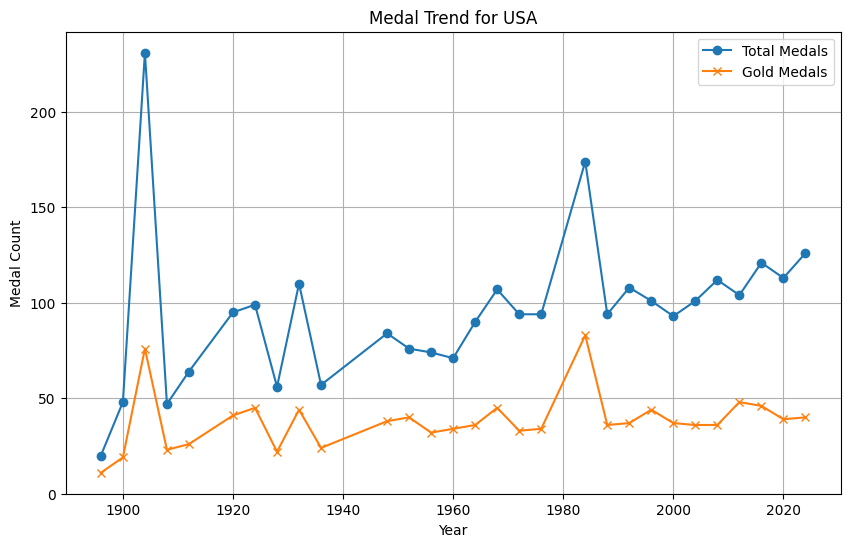

In [99]:
# 选择一个国家（例如 USA）
country = 'USA'
country_data = merged_df[merged_df['NOC'] == country]

# 绘制时间趋势图
plt.figure(figsize=(10, 6))
plt.plot(country_data['Year'], country_data['Total'], marker='o', label='Total Medals')
plt.plot(country_data['Year'], country_data['Gold'], marker='x', label='Gold Medals')
plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.title(f'Medal Trend for {country}')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:


# 填充缺失值
merged_df[['Athletes_count', 'Events_count', 'Sports_count']] = merged_df[
    ['Athletes_count', 'Events_count', 'Sports_count']].fillna(0)

# 计算参与次数（Times）
merged_df['Times'] = merged_df.groupby('NOC').cumcount() + 1

merged_df.to_csv('data/medal_final.csv', index=False)

# 选择特征列
features = ['Gold', 'Total', 'Times', 'is_host', 'Athletes_count', 'Events_count', 'Sports_count']
merged_df = merged_df[['NOC', 'Year'] + features]

print("\n合并后的数据形状:", merged_df.shape)
print("后5行数据：")
display(merged_df.tail(20))



合并后的数据形状: (1435, 9)
后5行数据：


,NOC,Year,Gold,Total,Times,is_host,Athletes_count,Events_count,Sports_count
1415,MDA,2024,0,4,5,0,26.0,27.0,10.0
1416,XKX,2024,0,2,3,0,0.0,0.0,0.0
1417,CYP,2024,0,1,2,0,15.0,23.0,9.0
1418,FJI,2024,0,1,3,0,0.0,0.0,0.0
1419,JOR,2024,0,1,3,0,12.0,13.0,6.0
1420,MNG,2024,0,1,13,0,0.0,0.0,0.0
1421,PAN,2024,0,1,3,0,8.0,13.0,6.0
1422,TJK,2024,0,3,4,0,14.0,14.0,6.0
1423,ALB,2024,0,2,1,0,8.0,9.0,4.0
1424,GRD,2024,0,2,4,0,0.0,0.0,0.0


In [100]:

# ======================
# 3. 构建时间序列数据
# ======================

n_timesteps = 10  # 使用过去5年的数据
n_features = len(features)

# 按国家和年份排序
merged_df = merged_df.sort_values(['NOC', 'Year'])

X, y = [], []
for noc in merged_df['NOC'].unique():
    country_data = merged_df[merged_df['NOC'] == noc]
    if len(country_data) < n_timesteps + 1:
        continue  # 跳过数据不足的国家
    
    # 转换为numpy数组
    values = country_data[features].values
    
    # 创建时间窗口
    for i in range(n_timesteps, len(country_data)):
        X.append(values[i-n_timesteps:i, :])
        y.append(values[i, 0])  # 预测当前年的金牌数

X = np.array(X)
y = np.array(y)
print("\n最终数据形状:", X.shape, y.shape)


最终数据形状: (545, 10, 7) (545,)


In [101]:


# ======================
# 4. 数据归一化
# ======================

# 初始化scaler
scaler = MinMaxScaler()

# 对每个样本单独归一化（保持时间步关系）
X_normalized = np.zeros_like(X)
for i in range(X.shape[0]):
    X_normalized[i] = scaler.fit_transform(X[i])

# 转换为PyTorch张量
X_tensor = torch.tensor(X_normalized, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

In [102]:


# ======================
# 5. 划分训练集/测试集
# ======================

split_ratio = 0.8
split = int(len(X) * split_ratio)

X_train, X_test = X_tensor[:split], X_tensor[split:]
y_train, y_test = y_tensor[:split], y_tensor[split:]

print("\n训练集形状:", X_train.shape, y_train.shape)
print("测试集形状:", X_test.shape, y_test.shape)


训练集形状: torch.Size([436, 10, 7]) torch.Size([436, 1])
测试集形状: torch.Size([109, 10, 7]) torch.Size([109, 1])


In [103]:



# ======================
# 6. 构建LSTM模型
# ======================

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out, _ = self.lstm(x)  # LSTM输出
        out = self.fc(out[:, -1, :])  # 只取最后一个时间步的输出
        return out

# 初始化模型
input_size = n_features
hidden_size = 64
output_size = 1
model = LSTMModel(input_size, hidden_size, output_size)

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [104]:
# ======================
# 7. 训练模型
# ======================

num_epochs = 2000
train_losses, test_losses = [], []

for epoch in range(num_epochs):
    # 训练模式
    model.train()
    optimizer.zero_grad()
    
    # 前向传播
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # 反向传播和优化
    loss.backward()
    optimizer.step()
    
    # 测试模式
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
    
    # 记录损失
    train_losses.append(loss.item())
    test_losses.append(test_loss.item())
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

Epoch [10/2000], Train Loss: 45.5658, Test Loss: 566.1349
Epoch [20/2000], Train Loss: 41.4541, Test Loss: 552.1592
Epoch [30/2000], Train Loss: 32.6209, Test Loss: 512.5312
Epoch [40/2000], Train Loss: 27.8731, Test Loss: 473.1963
Epoch [50/2000], Train Loss: 27.7423, Test Loss: 457.1899
Epoch [60/2000], Train Loss: 27.6596, Test Loss: 459.8498
Epoch [70/2000], Train Loss: 27.5403, Test Loss: 465.8571
Epoch [80/2000], Train Loss: 27.5126, Test Loss: 467.1508
Epoch [90/2000], Train Loss: 27.4499, Test Loss: 465.6079
Epoch [100/2000], Train Loss: 27.3534, Test Loss: 465.0577
Epoch [110/2000], Train Loss: 27.2260, Test Loss: 465.9323
Epoch [120/2000], Train Loss: 27.0763, Test Loss: 466.9413
Epoch [130/2000], Train Loss: 26.9011, Test Loss: 467.4938
Epoch [140/2000], Train Loss: 26.6892, Test Loss: 467.5572
Epoch [150/2000], Train Loss: 26.4251, Test Loss: 467.9743
Epoch [160/2000], Train Loss: 26.1032, Test Loss: 468.3536
Epoch [170/2000], Train Loss: 25.7347, Test Loss: 468.5764
Epoch 

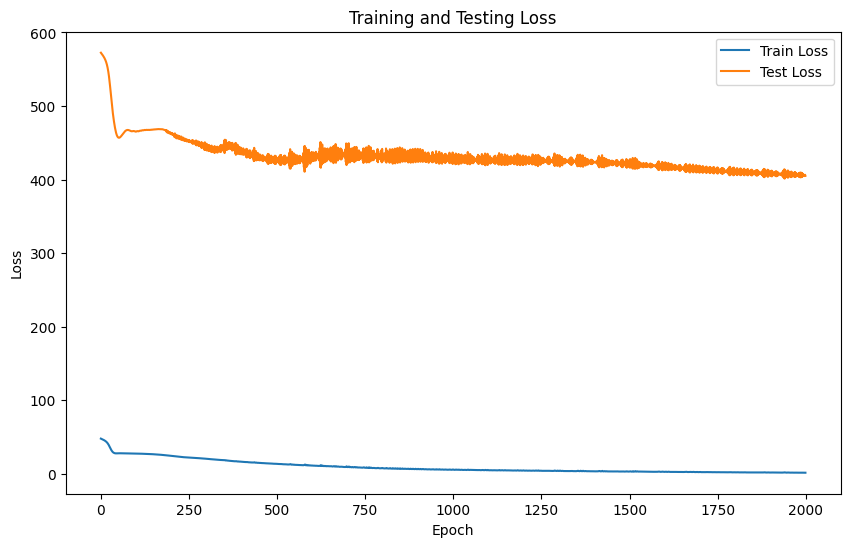

In [106]:
# ======================
# 8. 可视化训练过程
# ======================

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

In [95]:
# ======================
# 9. 模型评估
# ======================

model.eval()
with torch.no_grad():
    train_preds = model(X_train)
    test_preds = model(X_test)

# 计算MAE
train_mae = torch.mean(torch.abs(train_preds - y_train)).item()
test_mae = torch.mean(torch.abs(test_preds - y_test)).item()

print(f"训练集 MAE: {train_mae:.2f}")
print(f"测试集 MAE: {test_mae:.2f}")

训练集 MAE: 0.44
测试集 MAE: 19.93


In [97]:
# 将预测结果和实际值转换为 DataFrame
results = pd.DataFrame({
    'Year': merged_df['Year'].values[-len(y_test):],  # 测试集的年份
    'NOC': merged_df['NOC'].values[-len(y_test):],   # 测试集的国家
    'Actual Gold': y_test.flatten().numpy(),         # 实际金牌数
    'Predicted Gold': test_preds.flatten().numpy()   # 预测金牌数
})

# 输出部分预测结果
print("测试集预测结果：")
display(results.head(10))

测试集预测结果：


,Year,NOC,Actual Gold,Predicted Gold
0,1960,not found,36.0,21.963528
1,1960,not found,36.0,23.314299
2,1964,not found,48.0,17.545652
3,1964,not found,46.0,16.161100
4,1968,not found,39.0,11.719400
5,1968,not found,40.0,19.443832
6,1968,not found,5.0,17.377438
7,1968,not found,3.0,9.322235
8,1972,not found,50.0,2.634883
9,1972,not found,20.0,0.829476


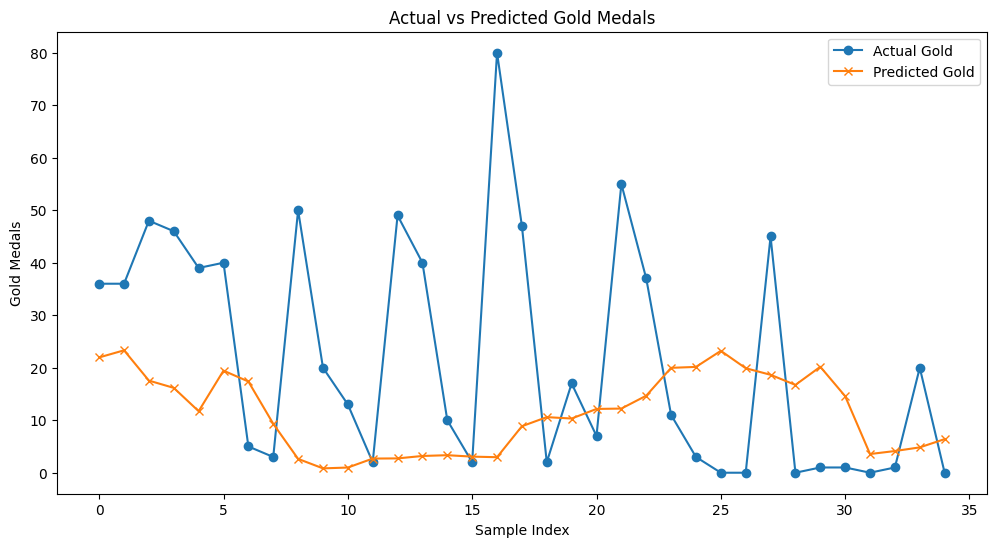

In [107]:
# 绘制实际值与预测值的对比图
plt.figure(figsize=(12, 6))
plt.plot(results['Actual Gold'], label='Actual Gold', marker='o')
plt.plot(results['Predicted Gold'], label='Predicted Gold', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Gold Medals')
plt.title('Actual vs Predicted Gold Medals')
plt.legend()
plt.show()

In [87]:
from sklearn.metrics import mean_squared_error, r2_score

# 计算 RMSE
train_rmse = np.sqrt(mean_squared_error(y_train.numpy(), train_preds.numpy()))
test_rmse = np.sqrt(mean_squared_error(y_test.numpy(), test_preds.numpy()))

# 计算 R²
train_r2 = r2_score(y_train.numpy(), train_preds.numpy())
test_r2 = r2_score(y_test.numpy(), test_preds.numpy())

print(f"训练集 RMSE: {train_rmse:.2f}")
print(f"测试集 RMSE: {test_rmse:.2f}")
print(f"训练集 R²: {train_r2:.2f}")
print(f"测试集 R²: {test_r2:.2f}")

训练集 RMSE: 0.43
测试集 RMSE: 20.64
训练集 R²: 0.99
测试集 R²: -0.16


USA 的预测结果：


,Year,NOC,Actual Gold,Predicted Gold


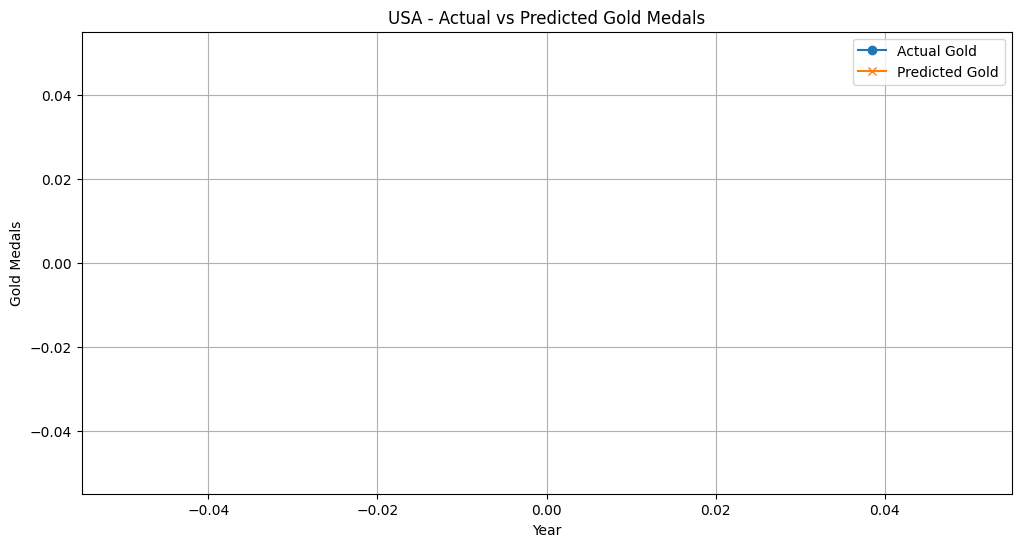

In [108]:
# 选择目标国家
target_noc = 'USA'

# 提取目标国家的实际值和预测值
target_results = results[results['NOC'] == target_noc]

# 输出目标国家的预测结果
print(f"{target_noc} 的预测结果：")
display(target_results)

# 绘制实际值与预测值的对比图
plt.figure(figsize=(12, 6))
plt.plot(target_results['Year'], target_results['Actual Gold'], label='Actual Gold', marker='o')
plt.plot(target_results['Year'], target_results['Predicted Gold'], label='Predicted Gold', marker='x')
plt.xlabel('Year')
plt.ylabel('Gold Medals')
plt.title(f'{target_noc} - Actual vs Predicted Gold Medals')
plt.legend()
plt.grid(True)
plt.show()

In [58]:
# 去掉某些国家（例如 USA 和 CHN）
excluded_nocs = ['USA', 'CHN']

# 提取未去除国家的数据
train_df = merged_df[~merged_df['NOC'].isin(excluded_nocs)]

# 构建时间序列数据
X_train, y_train = [], []
for noc in train_df['NOC'].unique():
    country_data = train_df[train_df['NOC'] == noc]
    if len(country_data) < n_timesteps + 1:
        continue  # 跳过数据不足的国家
    
    # 转换为numpy数组
    values = country_data[features].values
    
    # 创建时间窗口
    for i in range(n_timesteps, len(country_data)):
        X_train.append(values[i-n_timesteps:i, :])
        y_train.append(values[i, 0])  # 预测当前年的金牌数

X_train = np.array(X_train)
y_train = np.array(y_train)

# 转换为PyTorch张量
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

# 初始化模型
model = LSTMModel(input_size=n_features, hidden_size=64, output_size=1)

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练模型
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 59.0140
Epoch [20/100], Loss: 55.4380
Epoch [30/100], Loss: 52.2184
Epoch [40/100], Loss: 48.7237
Epoch [50/100], Loss: 46.4880
Epoch [60/100], Loss: 44.4194
Epoch [70/100], Loss: 42.5621
Epoch [80/100], Loss: 40.6907
Epoch [90/100], Loss: 38.7492
Epoch [100/100], Loss: 36.9334


In [110]:
# 初始化结果存储
all_results = []

# 获取所有年份
years = sorted(merged_df['Year'].unique())

# 对去除的国家逐年预测
for target_year in years:
    for noc in excluded_nocs:
        # 提取目标国家在目标年份之前的数据
        country_data = merged_df[(merged_df['NOC'] == noc) & (merged_df['Year'] < target_year)]
        if len(country_data) < n_timesteps:
            continue  # 跳过数据不足的国家
        
        # 检查目标年份是否存在该国家的数据
        target_data = merged_df[(merged_df['NOC'] == noc) & (merged_df['Year'] == target_year)]
        if len(target_data) == 0:
            continue  # 如果目标年份没有数据，跳过
        
        # 转换为numpy数组
        values = country_data[features].values
        
        # 创建时间窗口
        X_target = values[-n_timesteps:, :].reshape(1, n_timesteps, n_features)  # 添加 batch 维度
        y_target = target_data['Gold'].values[0]  # 目标年份的金牌数

        # 转换为PyTorch张量
        X_target_tensor = torch.tensor(X_target, dtype=torch.float32)

        # 预测目标年份的金牌数
        model.eval()
        with torch.no_grad():
            pred = model(X_target_tensor).item()

        # 存储结果
        all_results.append({
            'Year': target_year,
            'NOC': noc,
            'Actual Gold': y_target,
            'Predicted Gold': pred
        })

# 将结果转换为 DataFrame
results_df = pd.DataFrame(all_results)

# 输出结果
print("逐年预测结果：")
display(results_df)

逐年预测结果：


,Year,NOC,Actual Gold,Predicted Gold
0,1948,USA,38,6.517009
1,1952,USA,40,5.617128
2,1956,USA,32,4.073684
3,1960,USA,34,5.617329
4,1964,USA,36,5.636536
5,1968,USA,45,5.659249
6,1972,USA,33,5.991920
7,1976,USA,34,6.928835
8,1984,USA,83,6.951638
9,1988,USA,36,6.732325


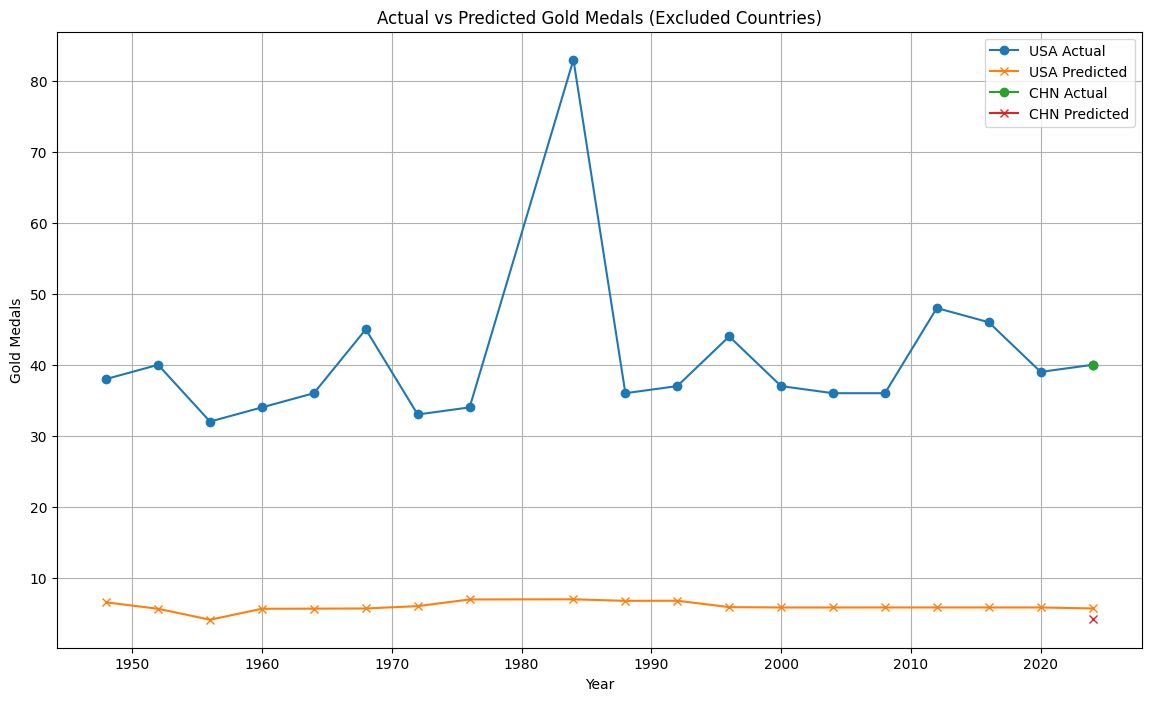

In [111]:
# 按国家分组，绘制对比图
plt.figure(figsize=(14, 8))
for noc in excluded_nocs:
    country_results = results_df[results_df['NOC'] == noc]
    plt.plot(country_results['Year'], country_results['Actual Gold'], label=f'{noc} Actual', marker='o')
    plt.plot(country_results['Year'], country_results['Predicted Gold'], label=f'{noc} Predicted', marker='x')

plt.xlabel('Year')
plt.ylabel('Gold Medals')
plt.title('Actual vs Predicted Gold Medals (Excluded Countries)')
plt.legend()
plt.grid(True)
plt.show()